![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Customer Analysis Final Round

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

### 01 - Problem (case study)

- Data Description.
- Goal.

We are using a Dataset with information about clients of a car insurance company.

Our goal is to predict the Total Claim Amount based on the rest of the data.

In [1]:
import pandas as pd
import numpy as np
import functions
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from scipy import stats

### 02 - Getting Data

- Read the `.csv` file.

In [2]:
df1 = pd.read_excel("files_for_lab/excel_files/marketing_customer_analysis.xlsx")
df1

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


### 03 - Cleaning/Wrangling/EDA

- Change headers names.
- Deal with NaN values.

In [3]:
display(df1.shape)
display(df1.isna().sum())

(9134, 24)

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [4]:
df1 = functions.lowercase_cols(df1)
df1 = functions.remove_na(df1)
df1

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [5]:
df1 = df1.rename(columns = {"employmentstatus" : "employment_status"})

df1

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


- Categorical Features.
- Numerical Features.

In [6]:
num = pd.DataFrame(df1.select_dtypes(np.number))
X_cat = pd.DataFrame(df1.select_dtypes("object"))

- Exploration.

<AxesSubplot:>

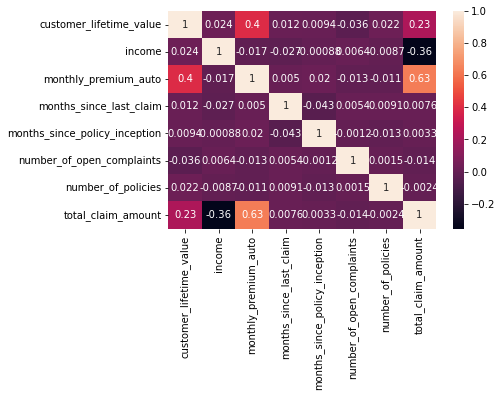

In [7]:
sns.heatmap(num.corr(), annot=True)

In [8]:
y = pd.DataFrame(df1['total_claim_amount'])
X = pd.DataFrame(num["monthly_premium_auto"])

### 04 - Processing Data

- Splitting into train set and test set.
- Dealing with outliers.
- Normalization.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6393, 1)
(2741, 1)
(6393, 1)
(2741, 1)


<AxesSubplot:ylabel='Count'>

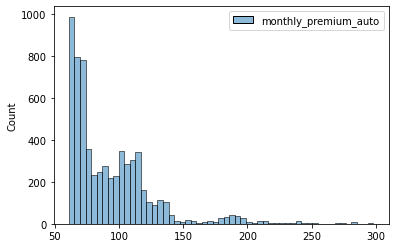

In [10]:
sns.histplot(X_train)

E:\Programs\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='monthly_premium_auto'>

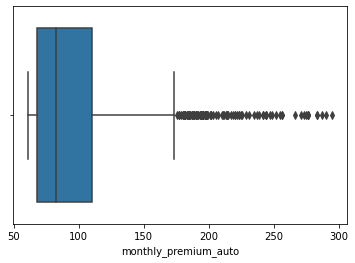

In [11]:
sns.boxplot(X_test["monthly_premium_auto"])

<AxesSubplot:ylabel='Count'>

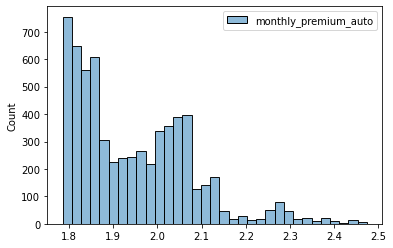

In [12]:
def log_transf(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN
    
    
x_train_log = pd.DataFrame(X_train["monthly_premium_auto"].apply(log_transf))
x_test_log = pd.DataFrame(X_test["monthly_premium_auto"].apply(log_transf))

sns.histplot(x_train_log)

In [13]:
minmax_x_trans = MinMaxScaler()
minmax_x_trans.fit(x_train_log)

x_train_norm_log = minmax_x_trans.transform(x_train_log)
x_train_norm_log = pd.DataFrame(x_train_norm_log, columns=x_train_log.columns)

x_test_norm_log = minmax_x_trans.transform(x_test_log)
x_test_norm_log = pd.DataFrame(x_test_norm_log, columns=x_train_log.columns)

x_train_norm_log

,monthly_premium_auto
0,0.510085
1,0.178774
2,0.068486
3,0.223824
4,0.000000
...,...
6388,0.010251
6389,0.086761
6390,0.068486
6391,0.020338


<AxesSubplot:ylabel='Count'>

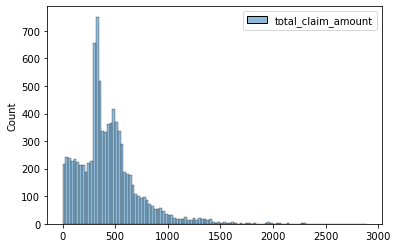

In [14]:
sns.histplot(y)

E:\Programs\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_claim_amount'>

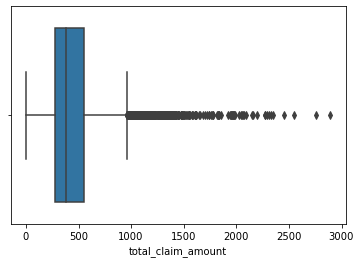

In [15]:
sns.boxplot(y['total_claim_amount'])

Y transformation and normalization, not needed

In [16]:
# y_train_boxcox = y_train.copy()
# y_test_boxcox = y_test.copy()


# mean = np.sum(y['total_claim_amount'])/len(y[y['total_claim_amount']>0])

# y_train_boxcox['total_claim_amount'] = np.where(y_train['total_claim_amount']<=0,0,y_train['total_claim_amount'])
# y_train_boxcox['total_claim_amount'] = y_train_boxcox['total_claim_amount'].replace(0,mean)

# y_test_boxcox['total_claim_amount'] = np.where(y_test['total_claim_amount']<=0,0,y_test['total_claim_amount'])
# y_test_boxcox['total_claim_amount'] = y_test_boxcox['total_claim_amount'].replace(0,mean)

# sns.displot(y_train_boxcox['total_claim_amount'])
# plt.show()

In [17]:
# y_train_boxcox, lmbda = stats.boxcox(y_train_boxcox['total_claim_amount'])
# y_test_boxcox, lmbda = stats.boxcox(y_test_boxcox['total_claim_amount'])

# sns.displot(y_train_boxcox)
# plt.show()

In [18]:
# y_train_boxcox = pd.DataFrame(y_train_boxcox, columns=['total_claim_amount'])
# y_test_boxcox = pd.DataFrame(y_test_boxcox, columns=['total_claim_amount'])

In [19]:
# minmax_y_trans = MinMaxScaler()
# minmax_y_trans.fit(y_train_boxcox)
# y_train_norm_boxcox = minmax_y_trans.transform(y_train_boxcox)
# y_train_norm_boxcox = pd.DataFrame(y_train_norm_boxcox, columns=y_train_boxcox.columns)
# y_test_norm_boxcox = minmax_y_trans.transform(y_test_boxcox)
# y_test_norm_boxcox = pd.DataFrame(y_test_norm_boxcox, columns=y_test_boxcox.columns)
# y_train_norm_boxcox

- Encoding Categorical Data.

In [20]:
def label_encoder(df, col):

    X_cat_col = pd.DataFrame(df[col])
    label_encoded = LabelEncoder().fit(X_cat_col).transform(X_cat_col)
    label_encoded = pd.DataFrame(label_encoded,columns=X_cat_col.columns)
    
    return label_encoded

state = label_encoder(X_cat, "state")
response = label_encoder(X_cat, "response")
coverage = label_encoder(X_cat, "coverage")
education = label_encoder(X_cat, "education")
effective_to_date = label_encoder(X_cat, "effective_to_date")
employment_status = label_encoder(X_cat, "employment_status")
gender = label_encoder(X_cat, "gender")
location_code = label_encoder(X_cat, "location_code")
marital_status = label_encoder(X_cat, "marital_status")
policy_type = label_encoder(X_cat, "policy_type")
policy = label_encoder(X_cat, "policy")
renew_offer_type = label_encoder(X_cat, "renew_offer_type")
sales_channel = label_encoder(X_cat, "sales_channel")
vehicle_class = label_encoder(X_cat, "vehicle_class")
vehicle_size = label_encoder(X_cat, "vehicle_size")

cat_encoded = pd.concat([state, response, coverage, education, 
                         effective_to_date, employment_status,
                         gender, location_code, marital_status, 
                         policy_type, policy, renew_offer_type, 
                         sales_channel, vehicle_class, vehicle_size], axis=1)
cat_encoded

E:\Programs\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Programs\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,4,0,0,0,47,1,0,1,1,0,2,0,0,5,1
1,0,0,1,0,24,4,0,1,2,1,5,2,0,0,1
2,2,0,2,0,41,1,0,1,1,1,5,0,0,5,1
3,1,0,0,0,12,4,1,1,1,0,1,0,2,3,1
4,4,0,0,0,52,1,1,0,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,0,0,0,32,1,1,2,1,1,3,1,3,0,1
9130,1,1,1,1,34,1,0,1,0,0,2,0,1,0,1
9131,1,0,1,0,55,4,1,1,2,0,1,0,1,0,1
9132,1,0,1,1,52,1,1,1,1,1,4,2,1,0,0


### 05 - Modeling

- Apply model.

In [21]:
# Normalization and logaritmic conversion

lm1 = linear_model.LinearRegression()
lm1.fit(x_train_norm_log,y_train)

LinearRegression()

In [22]:
# Only logaritmic

lm2 = linear_model.LinearRegression()
lm2.fit(x_train_log,y_train)

LinearRegression()

In [23]:
# Regular values

lm3 = linear_model.LinearRegression()
lm3.fit(X_train,y_train)

LinearRegression()

### 06 - Model Validation

- R2.
- MSE.
- RMSE.
- MAE.

In [24]:
y_pred_train_1 = lm1.predict(x_train_norm_log)
# y_pred_train = minmax_y_trans.inverse_transform(y_pred_train_pt)
print("R2 score por training is:", r2_score(y_train, y_pred_train_1))
print("MSE for training is:", mean_squared_error(y_train, y_pred_train_1))
print("RMSE for training is:", np.sqrt(mean_squared_error(y_train, y_pred_train_1)))
print("MAE for training is:", mean_absolute_error(y_train, y_pred_train_1))
print("MAPE for training is:", mean_absolute_percentage_error(y_train, y_pred_train_1))

print("------------------------")

y_pred_test_1 = lm1.predict(x_test_norm_log)
# y_pred_test = minmax_y_trans.inverse_transform(y_pred_test_pt)
print("R2 score por testing is:", r2_score(y_test, y_pred_test_1))
print("MSE for testing is:", mean_squared_error(y_test, y_pred_test_1))
print("RMSE for testing is:", np.sqrt(mean_squared_error(y_test, y_pred_test_1)))
print("MAE for testing is:", mean_absolute_error(y_test, y_pred_test_1))
print("MAPE for testing is:", mean_absolute_percentage_error(y_test, y_pred_test_1))

R2 score por training is: 0.36720366058915155
MSE for training is: 53277.8368348481
RMSE for training is: 230.81992295910703
MAE for training is: 158.96417219291368
MAPE for training is: 2.4818953141628053
------------------------
R2 score por testing is: 0.3720973964348524
MSE for testing is: 53252.14687744793
RMSE for testing is: 230.76426689903255
MAE for testing is: 158.69268598083787
MAPE for testing is: 3.115956176231943


In [25]:
y_pred_train_2 = lm2.predict(x_train_log)
# y_pred_train = minmax_y_trans.inverse_transform(y_pred_train_pt)
print("R2 score por training is:", r2_score(y_train, y_pred_train_2))
print("MSE for training is:", mean_squared_error(y_train, y_pred_train_2))
print("RMSE for training is:", np.sqrt(mean_squared_error(y_train, y_pred_train_2)))
print("MAE for training is:", mean_absolute_error(y_train, y_pred_train_2))
print("MAPE for training is:", mean_absolute_percentage_error(y_train, y_pred_train_2))

print("------------------------")

y_pred_test_2 = lm2.predict(x_test_log)
# y_pred_test = minmax_y_trans.inverse_transform(y_pred_test_pt)
print("R2 score por testing is:", r2_score(y_test, y_pred_test_2))
print("MSE for testing is:", mean_squared_error(y_test, y_pred_test_2))
print("RMSE for testing is:", np.sqrt(mean_squared_error(y_test, y_pred_test_2)))
print("MAE for testing is:", mean_absolute_error(y_test, y_pred_test_2))
print("MAPE for testing is:", mean_absolute_percentage_error(y_test, y_pred_test_2))

R2 score por training is: 0.36720366058915155
MSE for training is: 53277.8368348481
RMSE for training is: 230.81992295910703
MAE for training is: 158.96417219291376
MAPE for training is: 2.4818953141628035
------------------------
R2 score por testing is: 0.3720973964348523
MSE for testing is: 53252.14687744794
RMSE for testing is: 230.76426689903258
MAE for testing is: 158.69268598083795
MAPE for testing is: 3.1159561762319377


In [26]:
y_pred_train_3 = lm3.predict(X_train)
# y_pred_train = minmax_y_trans.inverse_transform(y_pred_train_pt)
print("R2 score por training is:", r2_score(y_train, y_pred_train_3))
print("MSE for training is:", mean_squared_error(y_train, y_pred_train_3))
print("RMSE for training is:", np.sqrt(mean_squared_error(y_train, y_pred_train_3)))
print("MAE for training is:", mean_absolute_error(y_train, y_pred_train_3))
print("MAPE for training is:", mean_absolute_percentage_error(y_train, y_pred_train_3))

print("------------------------")

y_pred_test_3 = lm3.predict(X_test)
# y_pred_test = minmax_y_trans.inverse_transform(y_pred_test_pt)
print("R2 score por testing is:", r2_score(y_test, y_pred_test_3))
print("MSE for testing is:", mean_squared_error(y_test, y_pred_test_3))
print("RMSE for testing is:", np.sqrt(mean_squared_error(y_test, y_pred_test_3)))
print("MAE for testing is:", mean_absolute_error(y_test, y_pred_test_3))
print("MAPE for testing is:", mean_absolute_percentage_error(y_test, y_pred_test_3))

R2 score por training is: 0.3997163932766684
MSE for training is: 50540.450476397775
RMSE for training is: 224.81203365566927
MAE for training is: 151.79939378647438
MAPE for training is: 2.46487451841543
------------------------
R2 score por testing is: 0.3986581590449635
MSE for testing is: 50999.540145671715
RMSE for testing is: 225.83077767583345
MAE for testing is: 151.56829316817863
MAPE for testing is: 3.2119894525457835


### 07 - Reporting

- Present results.

Model works best with no normalization or transformation, but it's not good.

In [27]:
results_train = y_train.copy()
results_train['y_pred'] = y_pred_train_3
results_train['residuals'] = results_train['total_claim_amount'] - results_train['y_pred']
results_train.head()

,total_claim_amount,y_pred,residuals
8150,385.440163,668.680210,-283.240047
9074,388.800000,367.537125,21.262875
4401,271.489602,297.628909,-26.139307
5979,234.057985,399.802456,-165.744471
1218,202.847644,259.986024,-57.138380


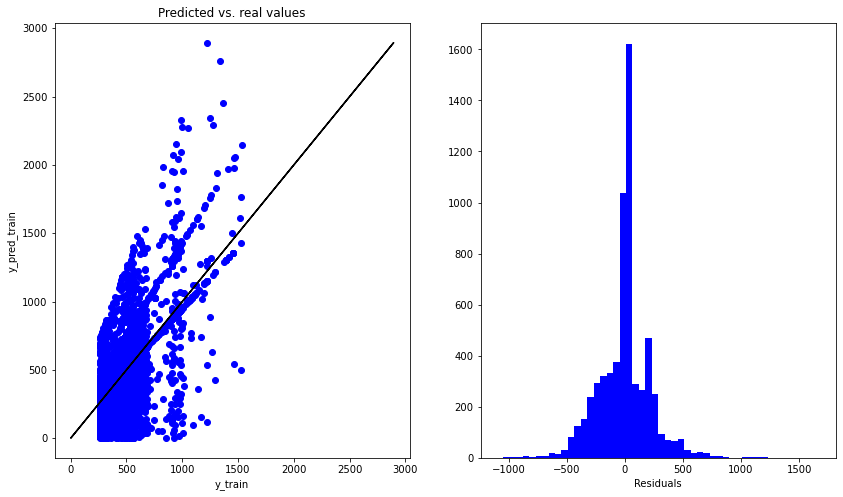

In [28]:
fig, axes = plt.subplots(1,2,figsize=(14,8))
axes[0].scatter(x=results_train['y_pred'], y=results_train['total_claim_amount'] , color = 'blue')
axes[0].plot(results_train['total_claim_amount'], results_train['total_claim_amount'], color = 'black')
axes[0].set_xlabel("y_train")
axes[0].set_ylabel("y_pred_train")
axes[0].set_title("Predicted vs. real values")
axes[1].hist(results_train['residuals'], color = "blue", bins = 50)
axes[1].set_xlabel("Residuals")
plt.show()